In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sympy import *

In [2]:
x_ = np.linspace(0, 6, 11)
f = np.array([np.log10(i**2 + 1) for i in x_])
#n = len(x)
n = 11

In [3]:
x_

array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ])

In [4]:
f

array([0.        , 0.13353891, 0.38738983, 0.62736586, 0.8299467 ,
       1.        , 1.14488542, 1.27044591, 1.38093446, 1.47943134,
       1.56820172])

In [5]:
h = np.diff(x_)
h_ = h[0]
h_

0.6

In [6]:
h


array([0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6])

In [7]:
a = h/6

In [8]:
a

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [9]:
b = np.zeros(10)
for i in range(1, n-2):
    b[i] = -2*h[i]/3

In [10]:
b

array([ 0. , -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,  0. ])

In [11]:
c = np.append(np.array([h[i+1]/6 for i in range(len(h)-1)]), 0.)

In [12]:
c

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ])

In [13]:
d = np.zeros(10)
for i in range(1, n-2):
    d[i] = (f[i-1]/h[i]) - f[i]*(1/h[i] + 1/h[i+1]) + (f[i+1]/h[i+1])
#d = np.array([(f[i-1]/h[i]) - f[i]*(1/h[i] + 1/h[i+1]) + (f[i+1]/h[i+1]) for i in range(1, n-1)])

In [14]:
d

array([ 0.        ,  0.20052002, -0.02312481, -0.06232532, -0.05421256,
       -0.04194648, -0.03220821, -0.02511989, -0.01998614,  0.        ])

In [15]:
print(f"N={n}\tlen(h)={len(h)}\tlen(a)={len(a)}\tlen(b)={len(b)}\tlen(c)={len(c)}\tlen(d)={len(d)}")

N=11	len(h)=10	len(a)=10	len(b)=10	len(c)=10	len(d)=10


# Прямий хід

In [16]:
alpha = np.zeros(9)
alpha[0] = 0
gamma = np.zeros(9)
gamma[0] = 0

In [17]:
for i in range(1, n-2):
    alpha[i] = c[i]/(b[i] - a[i]*alpha[i-1])
    gamma[i] = (a[i]*gamma[i-1] - d[i])/(b[i] - a[i]*alpha[i-1])

In [18]:
alpha

array([ 0.        , -0.25      , -0.26666667, -0.26785714, -0.26794258,
       -0.26794872, -0.26794916, -0.26794919, -0.26794919])

In [19]:
gamma

array([ 0.        ,  0.50130004, -0.19534618, -0.11461795, -0.1145475 ,
       -0.08170219, -0.06440961, -0.05005004, -0.04014182])

# Обернений хід

In [20]:
m = np.zeros(n)
m[n-1] = 0
m[n-2] = (a[n-2]*gamma[n-3] - d[n-2])/(b[n-2]-a[n-2]*alpha[n - 3])

In [21]:
for i in range(n-3, -1, -1):
    m[i] = alpha[i]*m[i+1] + gamma[i]

In [22]:
m

array([ 0.        ,  0.54421534, -0.17166121, -0.08881863, -0.09631745,
       -0.06803714, -0.05099874, -0.05005004,  0.        , -0.14981132,
        0.        ])

In [23]:
len(m)
m[1]

0.5442153426121373

# Побудова сплайну

In [24]:
x = symbols("x")


In [25]:
functions = []

In [26]:
for i in range(1, len(m)):
    first = round(m[i-1]/(6*h_), 7)
    second = round(m[i]/(6*h_), 7)
    third = round((f[i] - (m[i] * (h_**2))/6)/h_, 7)
    fourth = round((f[i-1] - (m[i-1] * (h_**2))/6)/h_, 7)
    main_expression = (first*(x_[i]-x)**3 + second*(x-x_[i-1])**3 + third*(x-x_[i-1]) + fourth*(x_[i] - x)).expand()
    functions.append(main_expression)

In [27]:
((m[1]/(6*h_))*(x-x_[i-1])**3).expand() + (((f[1] - (m[1] * (h_**2))/6)/h_)*(x-x_[0])).expand()

0.151170928503371*x**3 - 2.44896904175462*x**2 + 13.3925761384974*x - 23.8039790858549

In [28]:
for i in range(0, len(functions)):
    print(f"g_{i+1}(x) = {functions[i]}.")

g_1(x) = 0.1511709*x**3 + 0.1681433*x.
g_2(x) = -0.1988546*x**3 + 0.6300459*x**2 - 0.209884184*x + 0.0756054744.
g_3(x) = 0.0230119*x**3 - 0.1686735*x**2 + 0.748579188*x - 0.307779948.
g_4(x) = -0.00208299999999999*x**3 - 0.03316104*x**2 + 0.504656648*x - 0.1614262896.
g_5(x) = 0.00785559999999999*x**3 - 0.10471896*x**2 + 0.676395624*x - 0.2988174192.
g_6(x) = 0.0047329*x**3 - 0.07661466*x**2 + 0.592082596*x - 0.2145041352.
g_7(x) = 0.000263500000000002*x**3 - 0.02834514*x**2 + 0.418312432*x - 0.00598019759999824.
g_8(x) = 0.0139028*x**3 - 0.20020032*x**2 + 1.140104036*x - 1.0164880176.
g_9(x) = -0.0416143*x**3 + 0.59924592*x**2 - 2.697237816*x + 5.1232586256.
g_10(x) = 0.0416143*x**3 - 0.7490574*x**2 + 4.6273139*x - 8.2183041.


In [29]:
x_values = []
for i in range(n-1):
    x_values.append(np.linspace(x_[i], x_[i+1], 20))
x_values

[array([0.        , 0.03157895, 0.06315789, 0.09473684, 0.12631579,
        0.15789474, 0.18947368, 0.22105263, 0.25263158, 0.28421053,
        0.31578947, 0.34736842, 0.37894737, 0.41052632, 0.44210526,
        0.47368421, 0.50526316, 0.53684211, 0.56842105, 0.6       ]),
 array([0.6       , 0.63157895, 0.66315789, 0.69473684, 0.72631579,
        0.75789474, 0.78947368, 0.82105263, 0.85263158, 0.88421053,
        0.91578947, 0.94736842, 0.97894737, 1.01052632, 1.04210526,
        1.07368421, 1.10526316, 1.13684211, 1.16842105, 1.2       ]),
 array([1.2       , 1.23157895, 1.26315789, 1.29473684, 1.32631579,
        1.35789474, 1.38947368, 1.42105263, 1.45263158, 1.48421053,
        1.51578947, 1.54736842, 1.57894737, 1.61052632, 1.64210526,
        1.67368421, 1.70526316, 1.73684211, 1.76842105, 1.8       ]),
 array([1.8       , 1.83157895, 1.86315789, 1.89473684, 1.92631579,
        1.95789474, 1.98947368, 2.02105263, 2.05263158, 2.08421053,
        2.11578947, 2.14736842, 2.17894737

In [30]:
function_values = []
for i in range(n-1):
    function_values.append(np.array([float(functions[i].subs(x, val)) for val in x_values[i]]))
function_values

[array([0.        , 0.00531455, 0.01065766, 0.0160579 , 0.02154383,
        0.02714402, 0.03288702, 0.0388014 , 0.04491573, 0.05125857,
        0.05785848, 0.06474402, 0.07194377, 0.07948627, 0.08740011,
        0.09571383, 0.10445601, 0.1136552 , 0.12333998, 0.13353889]),
 array([0.13353889, 0.1442695 , 0.15550524, 0.16720854, 0.17934183,
        0.19186753, 0.20474807, 0.21794589, 0.23142339, 0.24514302,
        0.25906719, 0.27315834, 0.28737889, 0.30169127, 0.3160579 ,
        0.33044121, 0.34480363, 0.35910758, 0.3733155 , 0.3873898 ]),
 array([0.3873898 , 0.40129991, 0.41504318, 0.42862395, 0.44204659,
        0.45531544, 0.46843483, 0.48140914, 0.49424269, 0.50693984,
        0.51950494, 0.53194233, 0.54425636, 0.55645139, 0.56853175,
        0.58050181, 0.5923659 , 0.60412837, 0.61579357, 0.62736585]),
 array([0.62736585, 0.63884877, 0.65024272, 0.66154731, 0.67276214,
        0.68388683, 0.69492098, 0.7058642 , 0.71671609, 0.72747626,
        0.73814431, 0.74871985, 0.7592025 

In [31]:
xx = np.linspace(0, 6, 50)
y = np.array([np.log10(i**2 + 1) for i in xx])

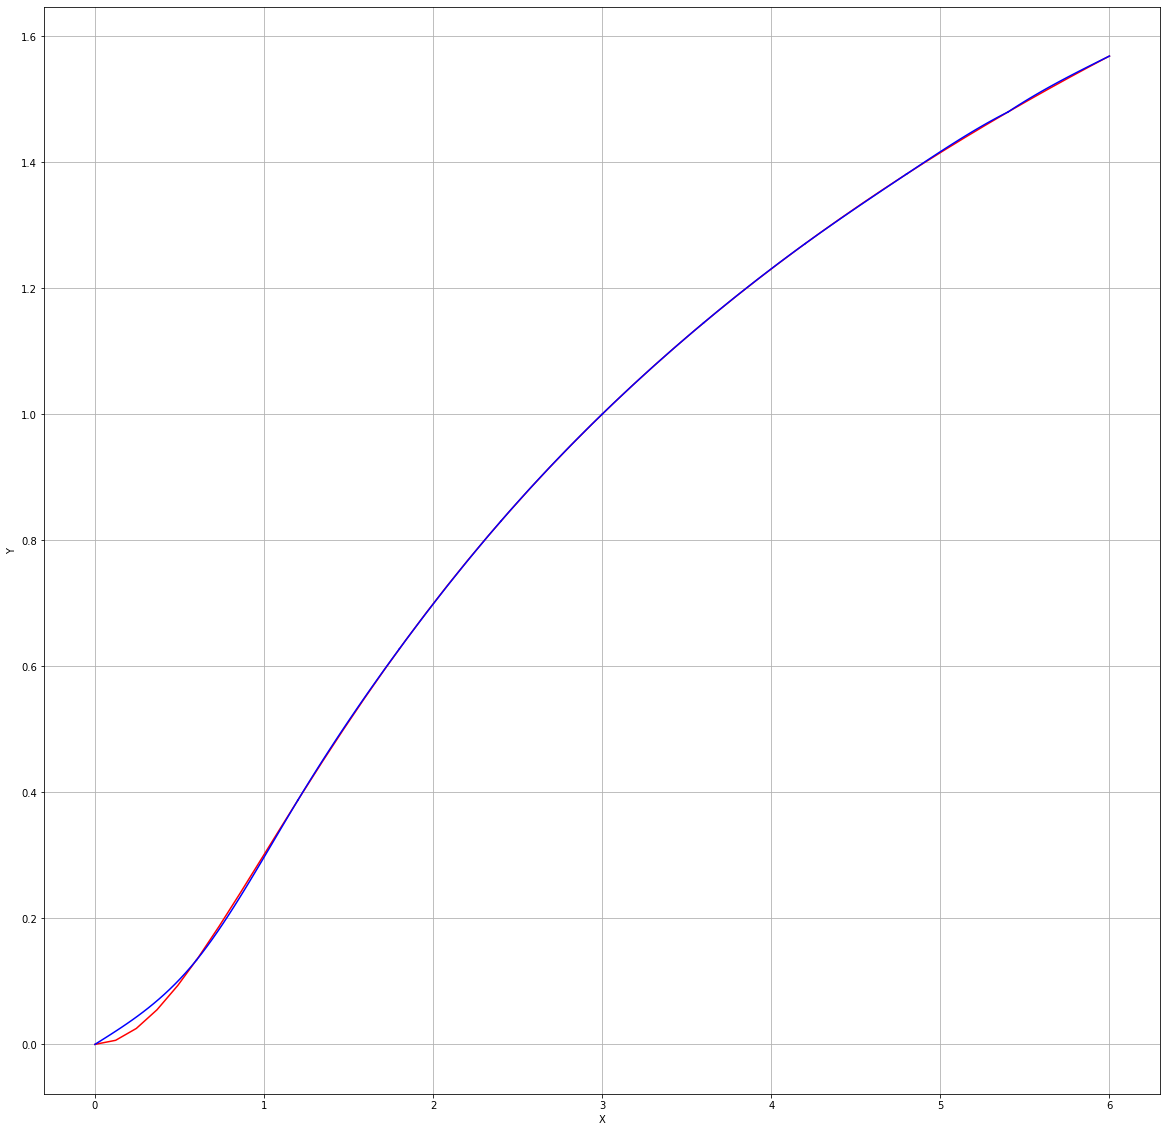

In [79]:
fig, ax = plt.subplots()
#plt.rcParams["figure.figsize"] = (20, 20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xx, y, c="r")
for i in range(0, n-1):
    plt.plot(x_values[i], function_values[i], c="b")
    
plt.savefig("spline_plot.png")


# Перевірка результатів

In [67]:
epsilon = 10**-7
def accuracy_check(a, b, eps):
    if abs(a - b) < eps: return True
    else: return False


In [82]:
def check_spline(func):
    with open("check_cpline.txt", "w") as main_file:
        accuracy = True
        for i in range(len(x_)):
            if i == len(x_) - 1:
                f = np.log10(x_[i]**2 + 1)
                g = func[i-1].subs(x, x_[i])
                print(f"g_{i}({round(x_[i], 2)}) = {g}.", file = main_file)
                print(f"f({round(x_[i], 2)}) = {f}.", file = main_file)
                if not(accuracy_check(f, g, epsilon)):
                    accuracy = False
            else:
                f = np.log10(x_[i]**2 + 1)
                g = func[i].subs(x, x_[i])
                print(f"g_{i+1}(x).....", file = main_file)
                print(f"g_{i+1}({round(x_[i], 2)}) = {g}.", file = main_file)
                print(f"f({round(x_[i], 2)}) = {f}.", file = main_file)
                if not(accuracy_check(f, g, epsilon)):
                    accuracy = False
                print("\n", file = main_file)
        print("Висновок:", file = main_file)
        if accuracy:
            print("Результати задовольняють точності 10**-7.\n", file = main_file)
        else: print("Результати не задовольняють точності 10**-7.\n", file = main_file)
        
        print("\nЗнайдемо другу похідну першого та останнього сплайну...", file = main_file)
        a = diff(diff(functions[0], x), x)
        b = diff(diff(functions[-1], x), x)

        print(f"g1''(x) = {a}.", file = main_file)
        print(f"g10''(x) = {b}.", file = main_file)
        print("Сплайн побудований правильно, якщо значення другої похідної першого сплайну в першій точці інтервалу \nдорівнює значенню другої похідної останнього сплайну в останній точці інтервалу та дорівнює нулю.", file = main_file)
        print("Перевіримо:", file = main_file)
        print(f"g1''({x_[0]}) = {a.subs(x, x_[0])}.", file = main_file)
        print(f"g10''({x_[-1]}) = {b.subs(x, x_[-1])}.", file = main_file)
    
          
          
check_spline(functions)


In [69]:
a = float(diff(diff(functions[0], x), x).subs(x, 0))
a

0.0

In [70]:
b = float(diff(diff(functions[-1], x), x).subs(x, 6))
b

-2.220446049250313e-16

In [71]:
accuracy_check(a, b, epsilon)

True